Authors:     
- Jesus Edward Rocca Huillca
- Oscar Mario Vargas Caldas 
      
©️ 2024

# PROCESS MINING (CONCEPTOS) 🗃️⛏️

📚**CONCEPTO:**  
 
"Colección de actividades para lograr cierto objetivo"
1. Logistica
2. Enviar paquetes
3. Instituciones financieras
4. Hospitales

 "Reconstruir los flujos de trabajo de las organizaciones a partir de la información recogida en los logs y bases de datos de los sistemas de información"✍🏻



❓ **COMO FUNCIONA:**  
Se basa en la recopilación de la huella digital de un proceso, los eventos se componen de campos básicos y atributos

Componen de campos básicos: 
1. Un identificador único de traza
2. La descripción de la actividad
3. El sello de tiempo    

Atributos:
1. Personas (turnos)
2. Máquinas (tipos)

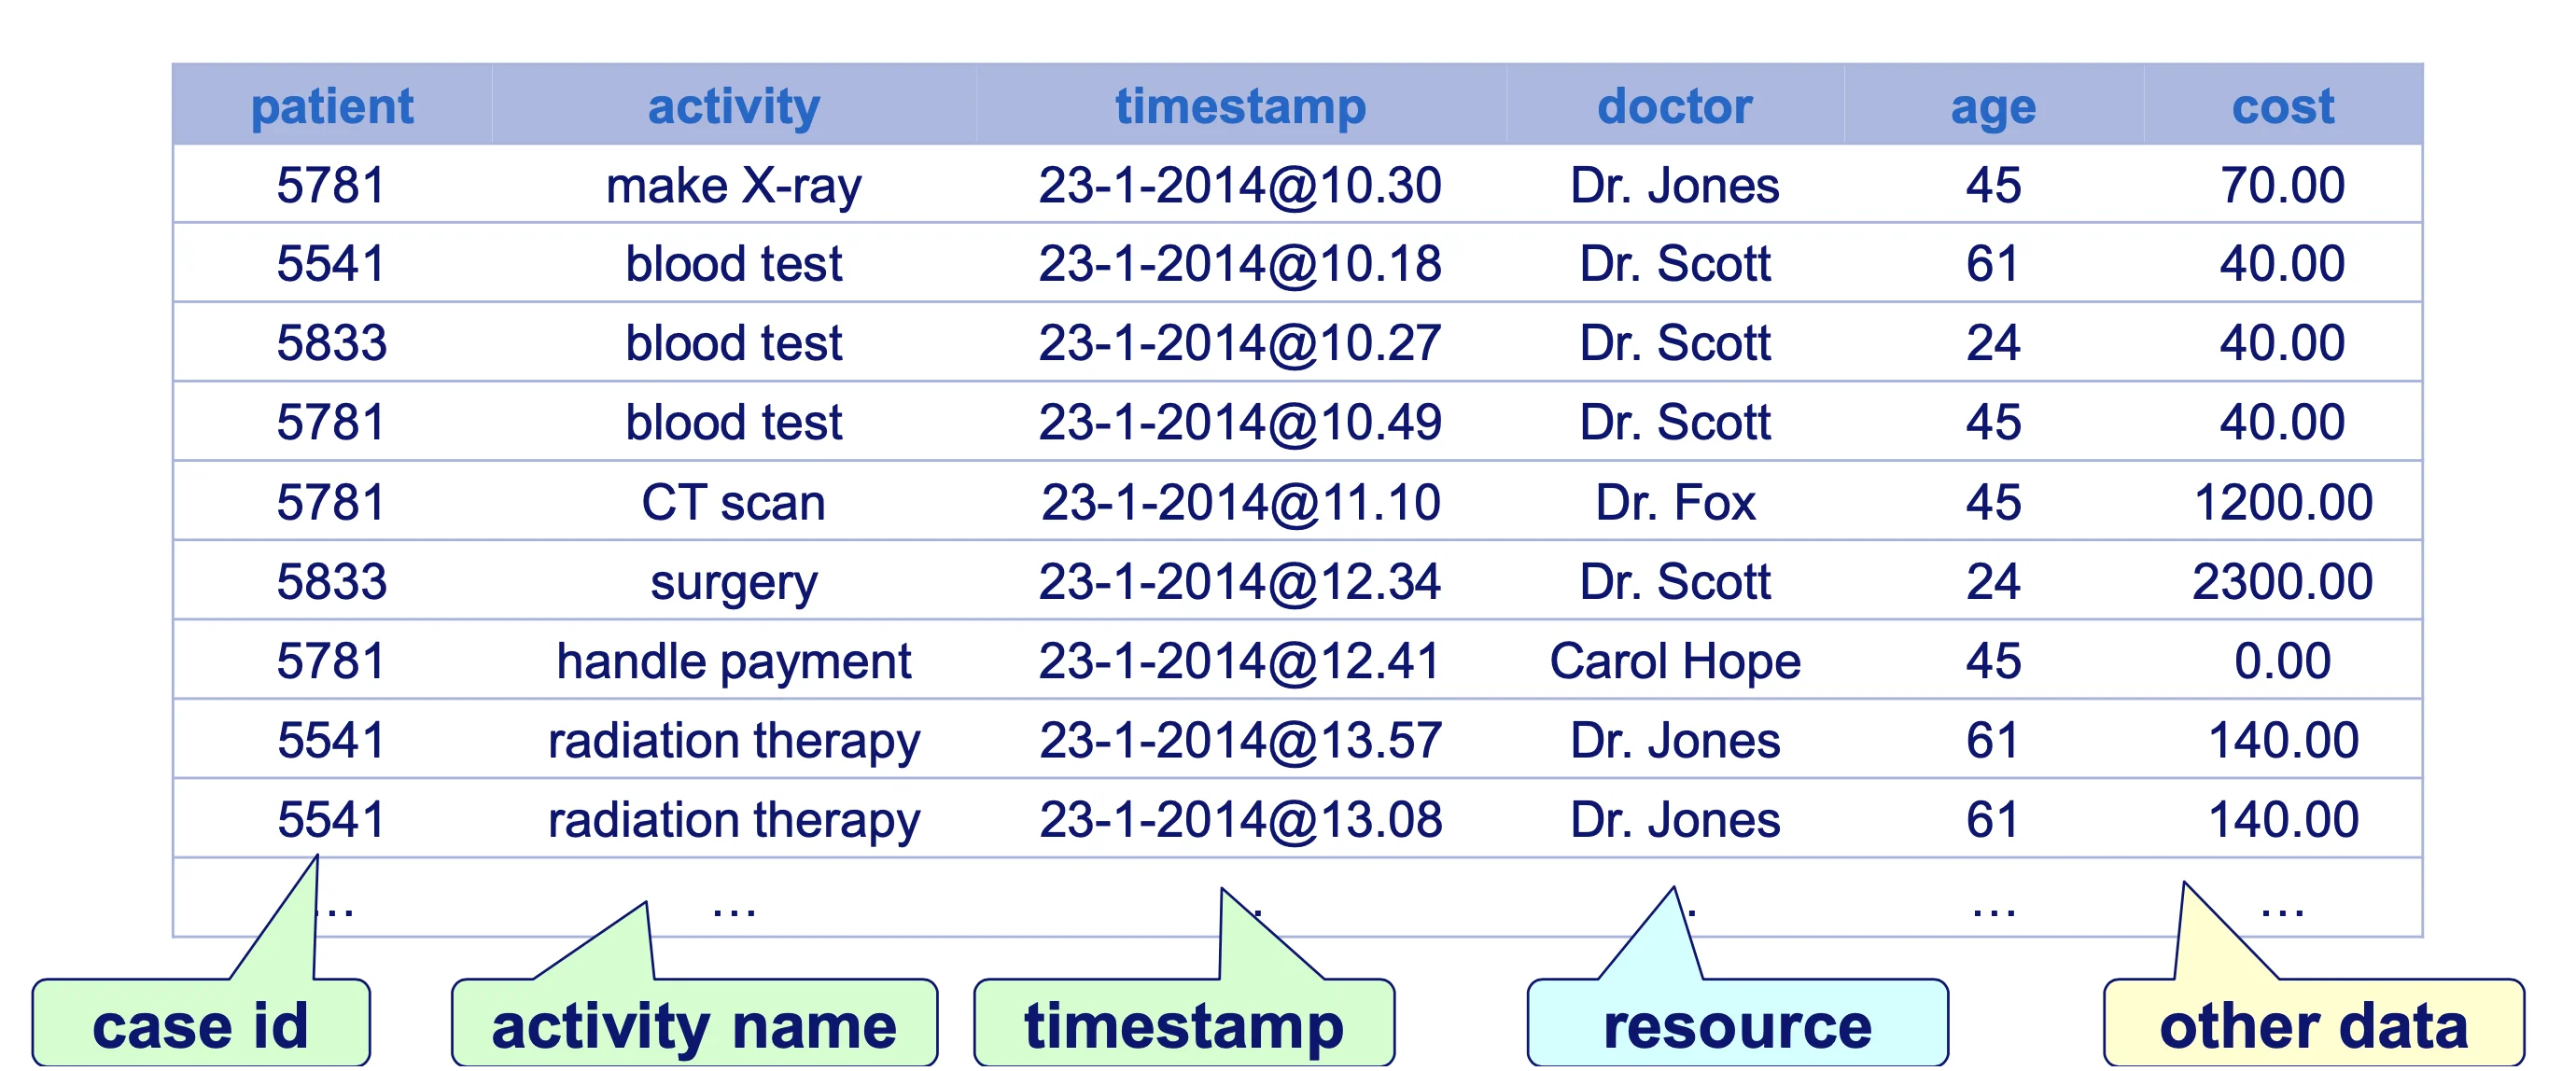

🥇 **BENEFICIOS**    
 - Permite descubrir la Vida Real de la Empresa y buscar la optimizacion y mejora de procesos
 - Detecta de modo inmediato las repeticiones de actividades.

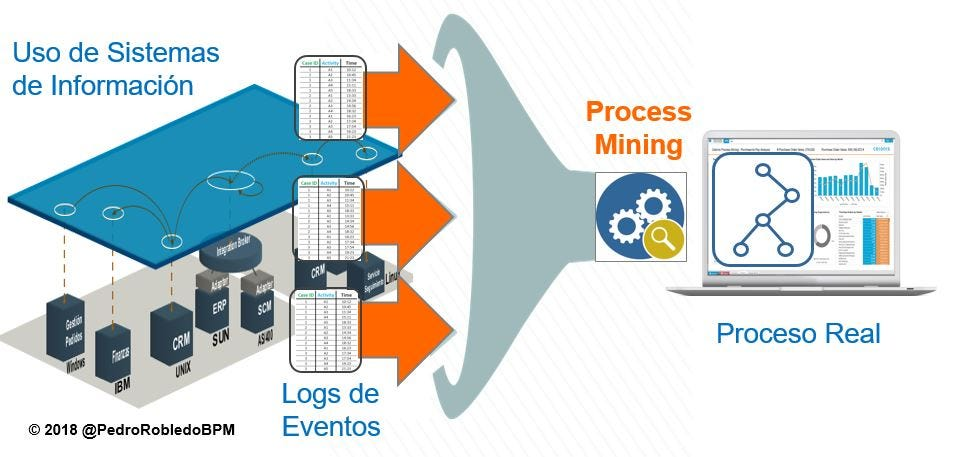

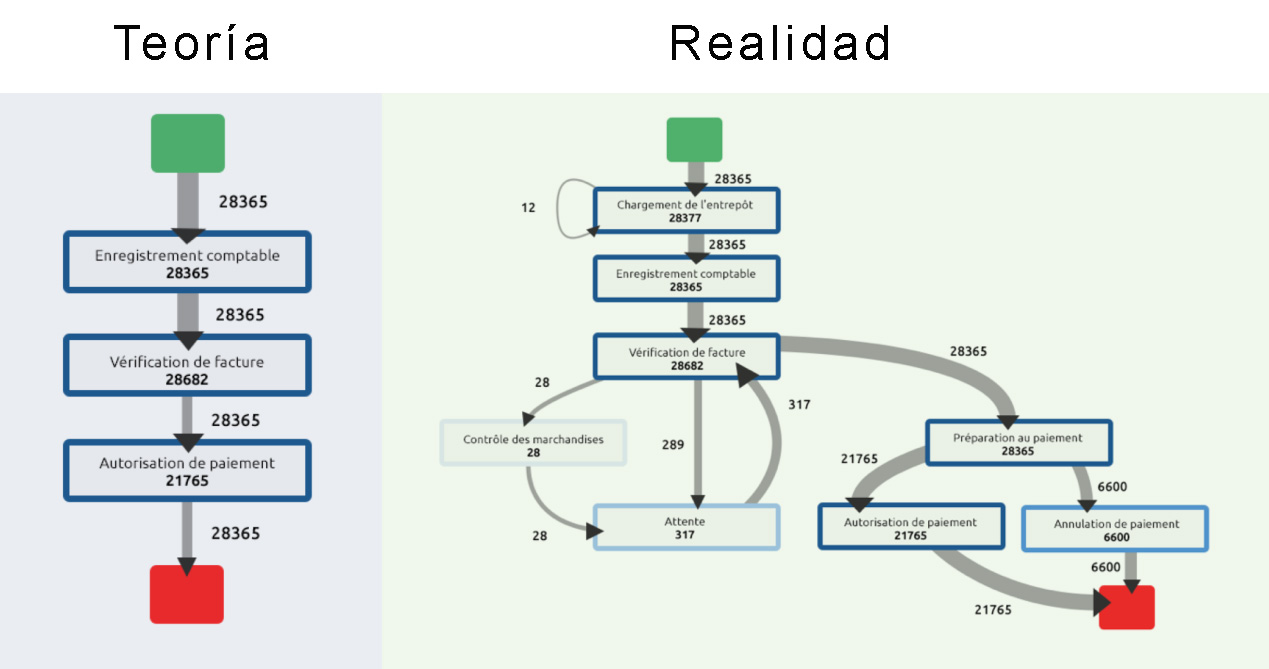

📈 **DE DONDE OBTENER LOS DATOS**    
Recomentacion: https://www.processmining.org/event-data.html

🛠️ **HERRAMIENTAS**
- ProM: De código abierto que ofrece cantidad de plugins para diferentes tipos de análisis
- Disco: Desarrollada por Fluxicon, es una herramienta comercial muy intuitiva y fácil de usar
- Celonis: Ofrece funcionalidades adicionales como la automatización de procesos y el análisis predictivo
- PM4PY:  Biblioteca de Python diseñada para facilitar la aplicación de técnicas de Process Mining ⭐⭐⭐

🧮 **LAS MATEMÁTICAS DETRAS DE PM**     

Process mining using α-algorithm 

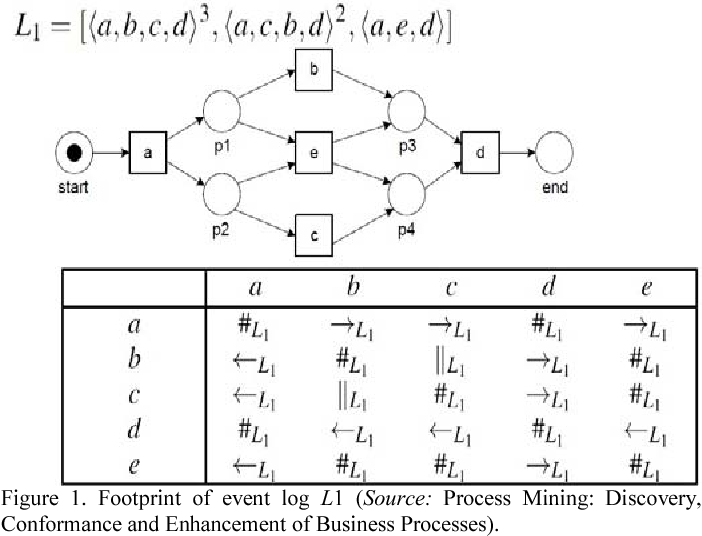


# PROCESS MINING (1ra PRACTICA) 🗃️⛏️

1️⃣ Instalacion de las herramientas

In [6]:
!pip install pm4py #Instalacion de la libreria ProcessMiningForPython

  Using cached pm4py-2.7.11.11-py3-none-any.whl.metadata (3.7 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl.metadata (4.6 kB)
  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
  Using cached intervaltree-3.1.0-py2.py3-none-any.whl
  Using cached lxml-5.2.2-cp310-cp310-win_amd64.whl.metadata (3.5 kB)
  Using cached pydotplus-2.0.2-py3-none-any.whl
  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
  Using cached cvxopt-1.3.2-cp310-cp310-win_amd64.whl.metadata (1.4 kB)
  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl.metadata (10 kB)
Using cached pm4py-2.7.11.11-py3-none-any.whl (1.9 MB)
Using cached cvxopt-1.3.2-cp310-cp310-win_amd64.whl (12.8 MB)
Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)
Using cached lxml-5.2.2-cp310-cp310-win_amd64.whl (3.8 MB)
Using cached networkx-3.3-py3-none-any.whl (1.7 MB)
Using cach


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pm4py 
import pandas as pd

#Verificamos que se hayan importado correctamente
print("pm4py y pandas se han importado correctamente.")

pm4py y pandas se han importado correctamente.


In [ ]:
#Descargamos e instalamos Graphviz en el ordenador para visualizar las gráficas
#https://graphviz.org/download/

In [ ]:
# DEscargamos la dataset
#  Data set: https://pm4py.fit.fraunhofer.de/static/assets/data/getting_started/running-example.csv


2️⃣ Importación de los 'event logs' desde un fichero csv

In [2]:
df = pd.read_csv('running_example.csv', delimiter = ';')

In [3]:
df.head()

,case_id,activity,timestamp,costs,resource
0,3,register request,2010-12-30 14:32:00+01:00,50,Pete
1,3,examine casually,2010-12-30 15:06:00+01:00,400,Mike
2,3,check ticket,2010-12-30 16:34:00+01:00,100,Ellen
3,3,decide,2011-01-06 09:18:00+01:00,200,Sara
4,3,reinitiate request,2011-01-06 12:18:00+01:00,200,Sara


In [5]:
# Número de registros (acciones)
df.shape

(42, 5)

In [6]:
# Número de eventos (case_id)
len(df.case_id.unique())

6

3️⃣ Conversion de datos

In [7]:
# Qué actividades suelen ser las primeras?
# Convertimos df ->data para trabajar com pm4py
data = pm4py.format_dataframe(df, case_id = 'case_id', activity_key = 'activity', timestamp_key='timestamp') #3 Columnas claves

In [8]:
# Comparar, mirar los concept:name y los @@index y @@case_index
data.head()

#Cambia el nombre de Index

,case_id,activity,timestamp,costs,resource,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,1,register request,2010-12-30 10:02:00+00:00,50,Pete,1,register request,2010-12-30 10:02:00+00:00,0,0
1,1,examine thoroughly,2010-12-31 09:06:00+00:00,400,Sue,1,examine thoroughly,2010-12-31 09:06:00+00:00,1,0
2,1,check ticket,2011-01-05 14:12:00+00:00,100,Mike,1,check ticket,2011-01-05 14:12:00+00:00,2,0
3,1,decide,2011-01-06 10:18:00+00:00,200,Sara,1,decide,2011-01-06 10:18:00+00:00,3,0
4,1,reject request,2011-01-07 13:24:00+00:00,200,Pete,1,reject request,2011-01-07 13:24:00+00:00,4,0


In [9]:

# Los nombres iniciales de cada evento
[x for x in df.case_id.unique()]

[3, 2, 1, 6, 5, 4]

In [10]:
# Se renombran (sea el nombre inicial que sea)
[x for x in data.case_id.unique()]

[1, 2, 3, 4, 5, 6]

In [11]:
#Determinamos la actividades de inicio y final
start_activities = pm4py.get_start_activities(data) # NOs da el valor inicial de la actividad
end_activities = pm4py.get_end_activities(data) #Nos da el valor final de la actividad
print('actividad de inicio es, ', start_activities, ' y la actividad final es ', end_activities)

actividad de inicio es,  {'register request': 6}  y la actividad final es  {'reject request': 3, 'pay compensation': 3}


In [12]:
#Ejemplo de las acciones del primer evento de la dataset inicial (BD Original)
[x for x in df[df['case_id'] == 3]['activity']]

['register request',
 'examine casually',
 'check ticket',
 'decide',
 'reinitiate request',
 'examine thoroughly',
 'check ticket',
 'decide',
 'pay compensation']

4️⃣ Visualizacion de los procesos

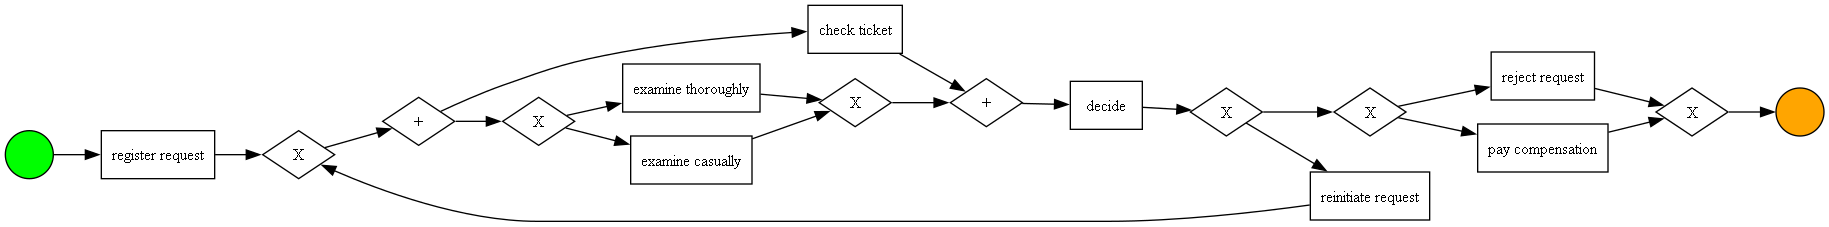

In [13]:
# Proceso inductivo de modelos en notación BPMN
# Ojo que se modifica el código vs el ejemplo, ya que se llama a discovery. Mirar API.
process_tree = pm4py.discovery.discover_process_tree_inductive(data)
bpmn_model = pm4py.convert_to_bpmn(process_tree)
pm4py.view_bpmn(bpmn_model) #visualizamos un modelo BPMN (Business Process Model and Notation)

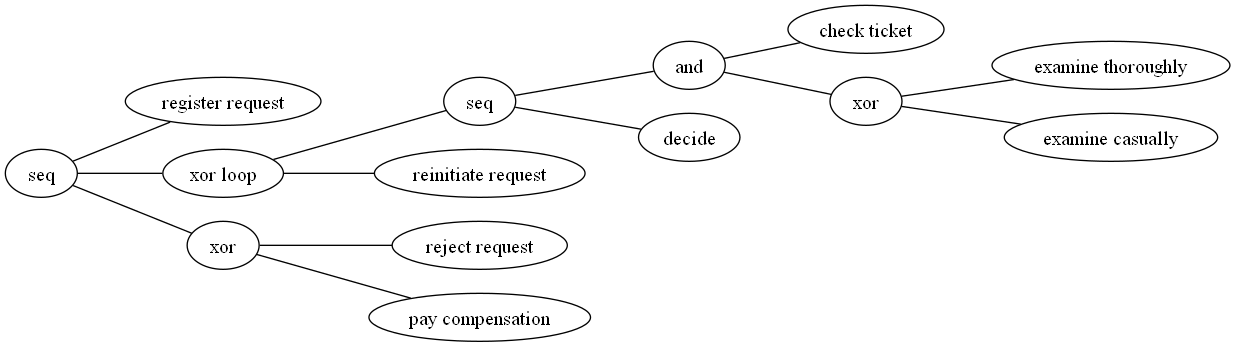

In [14]:
#Proceso mapeado como árbol de decisión (MEJORAMOS LA GRÁFICA DE PROCESOS)
pm4py.view_process_tree(process_tree)

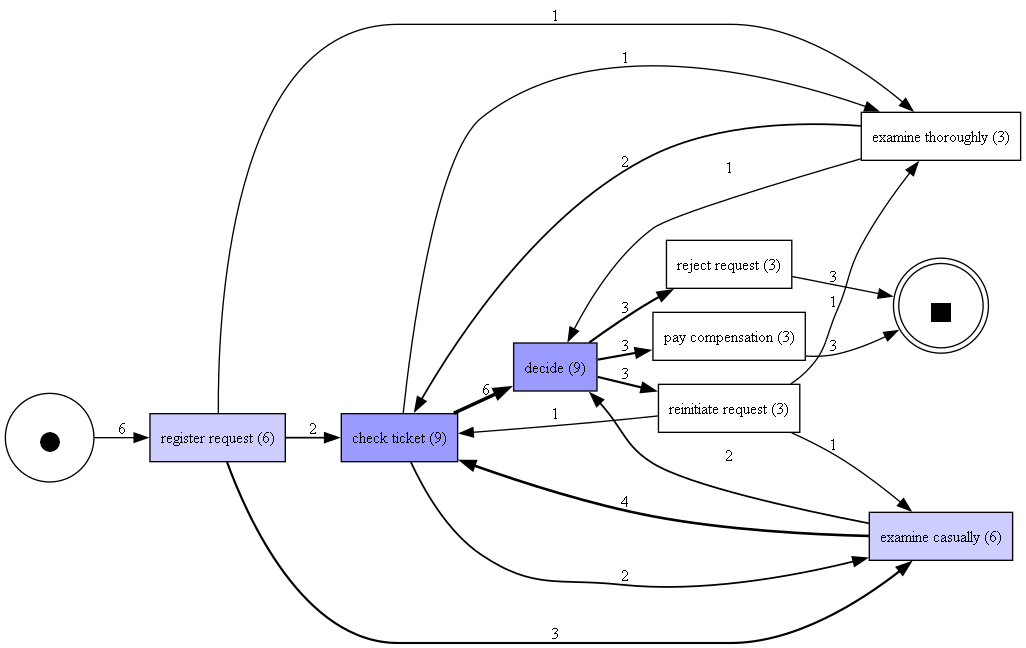

In [15]:

# Mapa de proceso DFG (Grafo dirigido)
dfg, start_activities, end_activities = pm4py.discover_dfg(data)
pm4py.view_dfg(dfg, start_activities, end_activities)

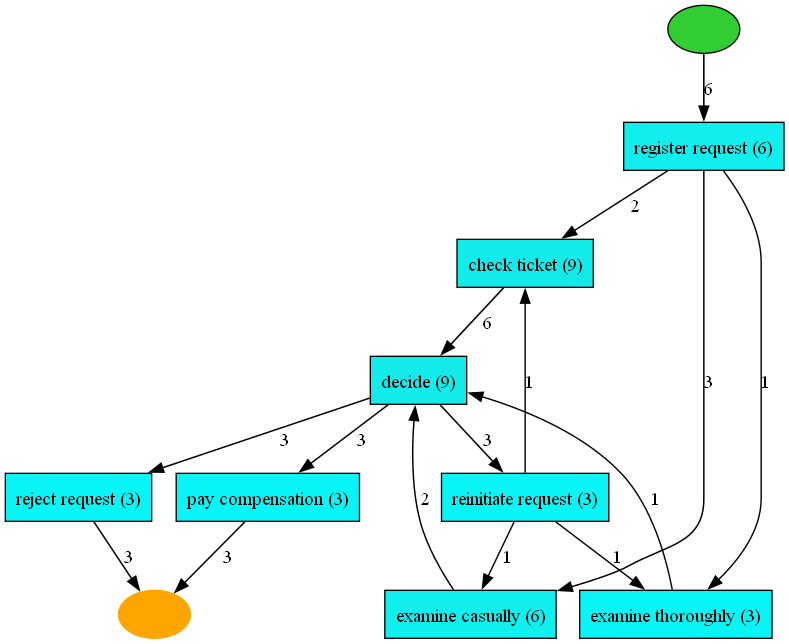

In [16]:
#Mejoramos con modo heuristico
map = pm4py.discover_heuristics_net(data)
pm4py.view_heuristics_net(map)

In [ ]:
#PM4PY (Documentación de la biblioteca de Python para mineria de procesos)
# https://pm4py.fit.fraunhofer.de/